In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
con = sqlite3.connect('zippedData/im.db')
cursor_obj = con.cursor()

In [231]:
mov_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
mov_info = pd.read_table('zippedData/rt.movie_info.tsv')
reviews = pd.read_table('zippedData/rt.reviews.tsv', encoding= 'unicode_escape')
db_mov = pd.read_csv('zippedData/tmdb.movies.csv', delimiter = ",")
rot_tom = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')

In [232]:
db_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [233]:
mov_info = mov_info.drop(columns = ['currency', "box_office", "studio"], axis = 1)
mov_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime'],
      dtype='object')

In [234]:
mov_info.sort_values(by='theater_date', inplace = True, ignore_index=True) 
mov_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,647,A singer (Frank Sinatra) and his pianist (Alex...,NR,Drama|Musical and Performing Arts,Joseph Pevney,Don McGuire,"Apr 1, 1952","Aug 3, 1994",86 minutes
1,1090,Voter apathy in the United States is at an all...,R,Classics|Comedy,NaN,Jack Margolis,"Apr 1, 1975","Sep 2, 2008",95 minutes
2,1969,Melvin Frank's burlesque amalgam of McCabe and...,PG,Action and Adventure|Comedy|Western,Melvin Frank,NaN,"Apr 1, 1976","Jun 7, 2005",104 minutes
3,29,This futuristic adventure stars Lee Majors as ...,PG,Action and Adventure|Drama|Science Fiction and...,Martyn Burke,NaN,"Apr 1, 1981","May 10, 2011",101 minutes
4,523,When a group of college students volunteer to ...,R,Horror,Stephen Carpenter|Jeffrey Obrow,NaN,"Apr 1, 1982","Mar 8, 2005",85 minutes
...,...,...,...,...,...,...,...,...,...
1555,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1556,1987,Patrick Dempsey stars in this biography of Son...,PG-13,Comedy,Phil Alden Robinson,Phil Alden Robinson,NaN,NaN,98 minutes
1557,1988,When the money-hungry Duke Stuyvesant (Sterlin...,R,Comedy,Les Rose,NaN,NaN,NaN,94 minutes
1558,1989,Hungarian Rhapsody (Magyar Rapszodia) is the f...,NR,Art House and International|Drama,NaN,NaN,NaN,NaN,101 minutes


In [235]:
rev = reviews.dropna()

In [236]:
db_mov.sort_values(by='release_date', inplace = True, ignore_index = True)
db_mov

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,14335,"[18, 10752]",143,en,All Quiet on the Western Front,9.583,1930-04-29,All Quiet on the Western Front,7.8,299
1,21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23
2,3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3
3,26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3
4,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243
...,...,...,...,...,...,...,...,...,...,...
26512,24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
26513,24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
26514,24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
26515,24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4


In [237]:

#db_mov.join(mov_info, lsuffix= "_left", rsuffix= "_right")
merged_mov = pd.merge(db_mov, rev)

merged_mov.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

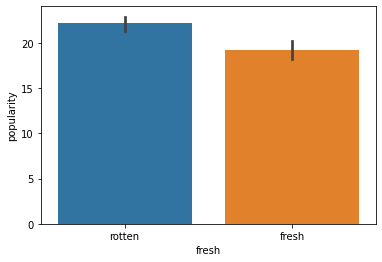

In [238]:
sns.barplot(x = 'fresh', y = 'popularity', data = merged_mov )
plt.show()

In [239]:
merged_mov

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,review,rating,fresh,critic,top_critic,publisher,date
0,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,Uneven movie about a charming cad has sexy stuff.,2/5,rotten,Nell Minow,0,Common Sense Media,"September 9, 2010"
1,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,Even Michael Caine's career would have gone no...,C-,rotten,Cole Smithey,0,ColeSmithey.com,"April 15, 2009"
2,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,full review in Greek,3/5,fresh,Joseph Proimakis,0,Movies for the Masses,"October 3, 2006"
3,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,...Alfie - when you get right down to it - isn...,2/4,rotten,David Nusair,0,Reel Film Reviews,"July 15, 2006"
4,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,"So, what's it all about? Is it still for the m...",C-,rotten,Christopher Smith,0,Bangor Daily News (Maine),"November 18, 2005"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,2474,"[28, 12, 878]",1771,en,Captain America: The First Avenger,25.808,2011-07-22,Captain America: The First Avenger,6.9,12810,The film is let down by a script that could ne...,C,rotten,Dennis Schwartz,0,Ozus' World Movie Reviews,"November 19, 2002"
694,5186,"[28, 12, 14]",1930,en,The Amazing Spider-Man,24.391,2012-07-04,The Amazing Spider-Man,6.5,10411,disjointed and disappointing,2/5,rotten,Tony Medley,0,tonymedley.com,"September 13, 2005"
695,5186,"[28, 12, 14]",1930,en,The Amazing Spider-Man,24.391,2012-07-04,The Amazing Spider-Man,6.5,10411,Second and least successful entry in the Harry...,3/5,fresh,Ken Hanke,0,"Mountain Xpress (Asheville, NC)","December 4, 2003"
696,24186,[18],221,en,Rebel Without a Cause,9.752,2018-09-23,Rebel Without a Cause,7.7,740,I would avoid this film as readily as one avoi...,C-,rotten,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 4, 2009"


In [240]:
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].str.replace("$","").str.replace(",","").astype(int)

In [241]:
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].str.replace("$","").str.replace(",","").astype(int)

In [242]:
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].str.replace("$","").str.replace(",","").astype("int64")



In [243]:
tn_movie_budgets["ROI"] = (tn_movie_budgets["worldwide_gross"] - tn_movie_budgets["production_budget"]) / tn_movie_budgets["production_budget"]




In [244]:
outliers_remove = tn_movie_budgets.drop(tn_movie_budgets[(tn_movie_budgets["ROI"] > 100) | (tn_movie_budgets["ROI"] < 0)].index)


In [245]:
outliers_remove

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,5.710167
...,...,...,...,...,...,...,...
5765,66,"Mar 9, 2001",Dayereh,10000,673780,673780,66.378000
5766,67,"Apr 28, 2006",Clean,10000,138711,138711,12.871100
5767,68,"Jul 6, 2001",Cure,10000,94596,94596,8.459600
5775,76,"May 26, 2006",Cavite,7000,70071,71644,9.234857


In [246]:
final_table = pd.merge(merged_mov, outliers_remove, on = 'id')

In [247]:
Final_table = final_table.sort_values(by = 'ROI', ascending = False)

In [248]:
Final_table.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date_x', 'title', 'vote_average', 'vote_count',
       'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date', 'release_date_y', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'ROI'],
      dtype='object')

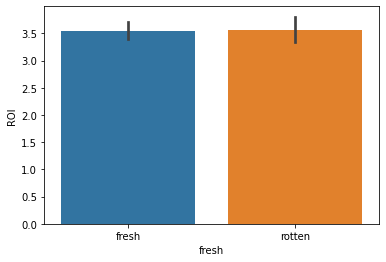

In [249]:
sns.barplot(x = 'fresh', y = 'ROI', data = Final_table )
plt.show()

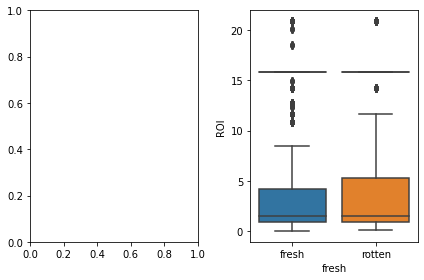

In [250]:
fig, ax = plt.subplots(1,2)
sns.boxplot(x = 'fresh', y = 'popularity', data = Final_table, orient = 'v', ax = ax[1])
sns.boxplot(x = 'fresh', y = 'ROI', data = Final_table, orient = 'v', ax = ax[1])
plt.tight_layout()

In [251]:
Table = pd.merge(Final_table, mov_info, on = ['id'])

In [252]:
Table.sort_values(by ="ROI", ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,worldwide_gross,ROI,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,runtime
0,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,24062965,20.875423,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116 minutes
74,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,24062965,20.875423,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116 minutes
72,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,24062965,20.875423,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116 minutes
71,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,24062965,20.875423,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116 minutes
70,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,24062965,20.875423,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,151525973,0.010173,"""Garbo Laughs",R,Classics|Comedy|Drama|Romance,Ernst Lubitsch,Charles Brackett|Billy Wilder|Walter Reisch|Me...,"Nov 3, 1939","Sep 5, 2005",110 minutes
4243,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,151525973,0.010173,"""Garbo Laughs",R,Classics|Comedy|Drama|Romance,Ernst Lubitsch,Charles Brackett|Billy Wilder|Walter Reisch|Me...,"Nov 3, 1939","Sep 5, 2005",110 minutes
4241,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,151525973,0.010173,"""Garbo Laughs",R,Classics|Comedy|Drama|Romance,Ernst Lubitsch,Charles Brackett|Billy Wilder|Walter Reisch|Me...,"Nov 3, 1939","Sep 5, 2005",110 minutes
4240,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,151525973,0.010173,"""Garbo Laughs",R,Classics|Comedy|Drama|Romance,Ernst Lubitsch,Charles Brackett|Billy Wilder|Walter Reisch|Me...,"Nov 3, 1939","Sep 5, 2005",110 minutes


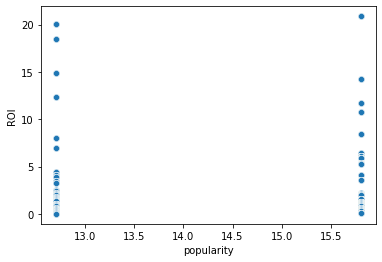

In [253]:
sns.scatterplot(x = 'popularity', y = 'ROI', data = Final_table )
plt.show()

In [254]:
Final_table

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,critic,top_critic,publisher,date,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,ROI
1909,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,Angie Errigo,0,The List,"November 28, 2016","Feb 11, 2005",Ong-Bak,1100000,4563167,24062965,20.875423
1051,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,Aine O'Connor,0,Sunday Independent (Ireland),"December 5, 2016","Feb 11, 2005",Ong-Bak,1100000,4563167,24062965,20.875423
1792,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,Marija Djurovic,0,Cairo360,"November 30, 2016","Feb 11, 2005",Ong-Bak,1100000,4563167,24062965,20.875423
1207,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,Wendy Ide,0,Observer (UK),"December 4, 2016","Feb 11, 2005",Ong-Bak,1100000,4563167,24062965,20.875423
3508,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,Chris Nashawaty,1,Entertainment Weekly,"November 16, 2016","Feb 11, 2005",Ong-Bak,1100000,4563167,24062965,20.875423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,Nell Minow,0,Movie Mom,"April 13, 2002","Oct 9, 2015",Pan,150000000,35088320,151525973,0.010173
313,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,James Sanford,0,Kalamazoo Gazette,"July 29, 2002","Oct 9, 2015",Pan,150000000,35088320,151525973,0.010173
40,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,David Parkinson,0,Empire Magazine,"February 10, 2012","Oct 9, 2015",Pan,150000000,35088320,151525973,0.010173
79,11109,"[80, 18, 9648, 53]",93,en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,...,Nell Minow,0,Common Sense Media,"December 26, 2010","Oct 9, 2015",Pan,150000000,35088320,151525973,0.010173
